<a href="https://colab.research.google.com/github/KamNg06/Business-Programming-/blob/main/stocks_daily_return.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Return of Stock Data

## Daily Return formula

Visiting a financial website that provides stock price information. Type a company’s name or its stock’s ticker symbol.  We will use the utility *curl* to download the data, but we need a URL.  To find the URL, navigate to Yahoo finance, type in NAB.AX, click the 'Historical' tab.  towards the right is a download option.  right click on the download link and select 'Copy Link Address' form the popup menu.  No paste to the URL assignment statement.

Find in the historical prices section the stock’s closing price for any two consecutive days. For example, assume a stock’s closing price was \$36.75 yesterday and that its closing price was \$35.50 the previous day. Subtract the previous day’s closing price from the most recent day’s closing price. In this example, subtract \$35.50 from \$36.75 to get \$1.25.

Now divide the results by the previous day's closing prices to calculate the daily return.  Multiply this by 100 to convert to a percentage.  So $1.25 divided by #35.50 equals 0.035.  Multiply 0.035 by 100 to 3.5 percent.

    Daily return = (Today prices - Yesterday price) / Yesterday price

We will look at three different methods in Python to process the file:
* Use read() and readline() functions
* Use CSV module
* Use Pandas


In [1]:
#Get the data
!curl "https://query1.finance.yahoo.com/v7/finance/download/NAB.AX?period1=1679997920&period2=1711620320&interval=1d&events=history&includeAdjustedClose=true" > nab_stock.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 17638    0 17638    0     0  63956      0 --:--:-- --:--:-- --:--:-- 64138


## Read CSV file

In [10]:
ADJ_CLOSE = 5
DATE = 0

daily_return =[]
dates = []

with open ('/content/nab_stock.csv') as f:
  line = f.readline()
  fildes = line.split(',')
  data = f.read()

stocks = []
for row in data.split('/n'):
    values = row.split(',')
    stocks.append(values)

print(stocks)
'''

explain in english the step i wnat to do
'''


[['2023-03-28', '27.700001', '27.809999', '27.575001', '27.660000', '26.041328', '5016242\n2023-03-29', '27.260000', '27.309999', '27.000000', '27.040001', '25.457613', '6533423\n2023-03-30', '27.360001', '27.670000', '27.240000', '27.670000', '26.050745', '6553990\n2023-03-31', '27.780001', '27.870001', '27.459999', '27.719999', '26.097818', '5142795\n2023-04-03', '27.750000', '28.150000', '27.700001', '27.910000', '26.276699', '5952544\n2023-04-04', '28.010000', '28.070000', '27.820000', '28.070000', '26.427336', '3692918\n2023-04-05', '28.049999', '28.120001', '27.740000', '28.040001', '26.399094', '4330406\n2023-04-06', '28.090000', '28.150000', '27.709999', '27.879999', '26.248455', '2959085\n2023-04-11', '28.100000', '28.360001', '27.900000', '28.250000', '26.596804', '4092490\n2023-04-12', '28.299999', '28.360001', '28.000000', '28.110001', '26.464996', '2663818\n2023-04-13', '28.180000', '28.295000', '27.969999', '28.129999', '26.483824', '3026975\n2023-04-14', '27.900000', '28

## Module: CSV

In [28]:
import csv

ADJ_CLOSE = 5
DATE = 0

daily_return =[]
dates = []

with open ('/content/nab_stock.csv') as f:
  reader = csv.reader(f, delimiter=',')
  fields = next(reader, None) # Get the header row

  second_row = next(reader, None)
yesterday_price = float(second_row[ADJ_CLO])
for row in reader:
    # Code inside the loop
    pass

NameError: name 'ADJ_CLO' is not defined

## Module: Pandas

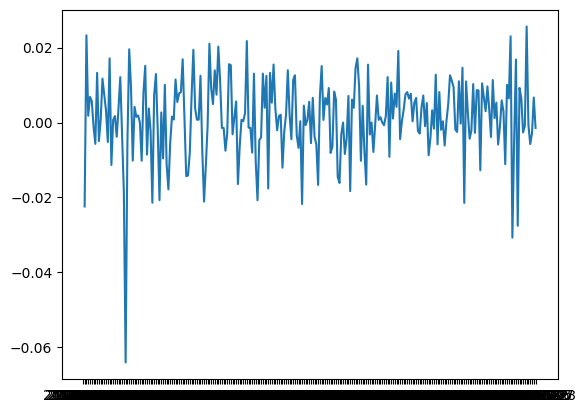

In [25]:
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/content/nab_stock.csv')

data['Daily Return'] = data['Adj Close'] / data['Adj Close'].shift(1) - 1

x = data['Date']
y = data['Daily Return']

plt.plot(x, y)